In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

from automata.configs.config_enums import ConfigCategory
from automata.tools.search.symbol_converter import SymbolConverter
from automata.tools.search.symbol_graph import SymbolGraph
from automata.tools.search.symbol_rank.symbol_embedding_map import SymbolEmbeddingMap
from automata.tools.search.symbol_rank.symbol_similarity import SymbolSimilarity

In [2]:
file_dir = os.getcwd()

scip_path = os.path.join(
    file_dir, "..", "configs", ConfigCategory.SYMBOLS.value, "index.scip"
)
embedding_path = os.path.join(
    file_dir, "..", "configs", ConfigCategory.SYMBOLS.value, "symbol_embedding.json"
)


In [3]:
symbol_converter = SymbolConverter()
symbol_graph = SymbolGraph(scip_path, symbol_converter)
symbol_embedding = SymbolEmbeddingMap(
    load_embedding_map=True,
    embedding_path=embedding_path,
)


In [4]:
embedded_symbols = list(symbol_embedding.embedding_map)
filtered_embedded_symbols = [ele for ele in embedded_symbols if 'Automata' in ele.uri]
print(len(embedded_symbols)), print(len(filtered_embedded_symbols))
symbol_embedding.filter_embedding_map(filtered_embedded_symbols)

390
90
Length of the embedding map before filtering:  390
Length of the embedding map after filtering:  90


In [5]:
symbol_similarity = SymbolSimilarity(symbol_embedding)


In [6]:
prefix = 'scip-python python automata 4d57f302bbe1f8b007a4007033d6e3f16b8c1d43'
for symbol in symbol_similarity.symbol_to_index:
    
    print("Including Symbol >> ", symbol.uri.replace(prefix, '').strip())
    
    

Including Symbol >>  `automata.configs.automata_agent_config_utils`/AutomataAgentConfigBuilder#_validate_type().
Including Symbol >>  `automata.configs.automata_agent_config_utils`/AutomataAgentConfigBuilder#build().
Including Symbol >>  `automata.configs.automata_agent_config_utils`/AutomataAgentConfigBuilder#from_config().
Including Symbol >>  `automata.configs.automata_agent_config_utils`/AutomataAgentConfigBuilder#from_name().
Including Symbol >>  `automata.configs.automata_agent_config_utils`/AutomataAgentConfigBuilder#with_eval_mode().
Including Symbol >>  `automata.configs.automata_agent_config_utils`/AutomataAgentConfigBuilder#with_helper_agent_configs().
Including Symbol >>  `automata.configs.automata_agent_config_utils`/AutomataAgentConfigBuilder#with_instruction_payload().
Including Symbol >>  `automata.configs.automata_agent_config_utils`/AutomataAgentConfigBuilder#with_instruction_version().
Including Symbol >>  `automata.configs.automata_agent_config_utils`/AutomataAgentC

In [7]:
similarity_matrix = symbol_similarity.generate_similarity_matrix()



In [8]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns
import pandas as pd

def plot_similarity_heatmap(similarity_df, n=20, figsize=(10,8), cmap='viridis', do_log=False):
    """
    Plots a heatmap of the similarity matrix.

    Args:
        similarity_object (SymbolSimilarity): SymbolSimilarity object.
        n (int): Label every nth symbol on the axes.
        figsize (tuple): Figure size.
        cmap (str): Color map.
    """

    # Generate the similarity matrix and create the DataFrame

    # Get the symbols and create labels for every nth symbol
    symbols = [symbol.uri.split('/')[1] for symbol in symbol_similarity.index_to_symbol.values()]
#     symbols = [symbol.split("#")[0] for symbol in symbols]
    labels = ['' if i % n != 0 else symbol for i, symbol in enumerate(symbols)]

    # Note that you should add a small constant to avoid log(0)

    # Create the heatmap
    plt.figure(figsize=figsize)

    # Plot the heatmap
    if do_log:
        df_log_norm = LogNorm(vmin=similarity_df.min().min()+0.01, vmax=similarity_df.max().max())
        sns.heatmap(similarity_df, cmap=cmap, xticklabels=labels, yticklabels=labels, norm=df_log_norm)
    else:
        sns.heatmap(similarity_df, cmap=cmap, xticklabels=labels, yticklabels=labels)


    # Optional: Rotate the x-axis labels if they overlap
    plt.xticks(rotation=90)

    plt.show()


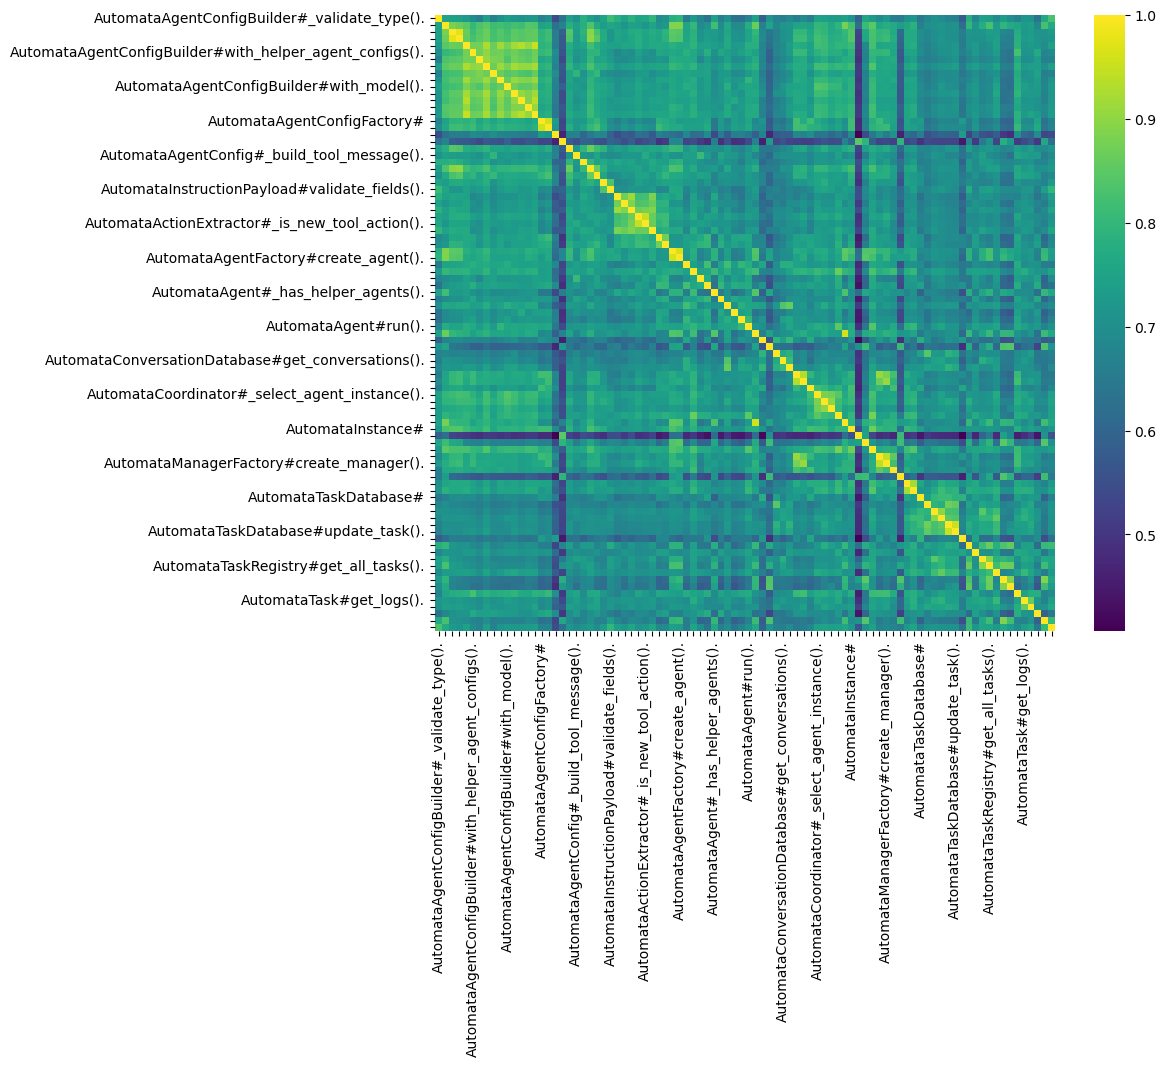

In [9]:
similarity_matrix = symbol_similarity.generate_similarity_matrix(norm_type="l2")
similarity_df = pd.DataFrame(similarity_matrix)
plot_similarity_heatmap(similarity_df, n =5)


In [10]:
import textwrap
snippet = textwrap.dedent('''

class AutomataAgentConfigBuilder(BaseModel):
    """
    The AutomataAgentConfigBuilder class is a builder for constructing instances of AutomataAgents.
    It offers a flexible and easy-to-use interface for setting various properties of the agent before instantiation.
    """

    _config: AutomataAgentConfig = PrivateAttr()

    def __init__(self, config: Optional[AutomataAgentConfig] = None):
        super().__init__()
        self._config = config or AutomataAgentConfig()

    @classmethod
    def from_name(cls, config_name: AgentConfigName) -> "AutomataAgentConfigBuilder":
        """
        Create an AutomataAgentConfigBuilder instance using the provided configuration object name.

        Args:
            config_name (AgentConfigName): The name of the configuration object for the AutomataAgent.

        Returns:
            AutomataAgentConfigBuilder: A new AutomataAgentConfigBuilder instance
        """
        instance = cls(AutomataAgentConfig.load(config_name))
        return instance

    @classmethod
    def from_config(cls, config: AutomataAgentConfig) -> "AutomataAgentConfigBuilder":
        """
        Create an AutomataAgentConfigBuilder instance using the provided configuration object.

        Args:
            config (AutomataAgentConfig): The provided configuration object for the AutomataAgent.

        Returns:
            AutomataAgentConfigBuilder: A new AutomataAgentConfigBuilder instance
        """
        instance = cls(config)
        return instance

    def with_instruction_payload(
        self, instruction_payload: AutomataInstructionPayload
    ) -> "AutomataAgentConfigBuilder":
        """
        Set the initial payload for the AutomataAgent instance.

        Args:
            instruction_payload (AutomataInstructionPayload): A dictionary containing the initial payload for the AutomataAgent.

        Returns:
            AutomataAgentConfigBuilder: The current AutomataAgentConfigBuilder instance with the updated instruction_payload.
        """
        self._config.instruction_payload = instruction_payload
        return self

    def with_llm_toolkits(
        self, llm_toolkits: Dict[ToolkitType, Toolkit]
    ) -> "AutomataAgentConfigBuilder":
        """
        Set the low-level manipulation (LLM) toolkits for the AutomataAgent instance.

        Args:
            llm_toolkits (Dict[ToolkitType, Toolkit]): A dictionary containing the LLM toolkits for the AutomataAgent.

        Returns:
            AutomataAgentConfigBuilder: The current AutomataAgentConfigBuilder instance with the updated llm_toolkits.
        """
        self._config.llm_toolkits = llm_toolkits
        return self

    def with_model(self, model: str) -> "AutomataAgentConfigBuilder":
        """
        Set the model for the AutomataAgent instance and validate if it is supported.

        Args:
            model (str): A string containing the model name for the AutomataAgent.

        Raises:
            ValueError: If the provided model is not found in the list of supported models.

        Returns:
            AutomataAgentConfigBuilder: The current AutomataAgentConfigBuilder instance with the updated model.
        """
        self._config.model = model
        if model not in AutomataAgentConfig.Config.SUPPORTED_MODELS:
            raise ValueError(f"Model {model} not found in Supported OpenAI list of models.")
        return self

    def with_stream(self, stream: bool) -> "AutomataAgentConfigBuilder":
        """
        Set the stream flag for the AutomataAgent instance.

        Args:
            stream (bool): A boolean value indicating whether to use streaming mode for the AutomataAgent.

        Returns:
            AutomataAgentConfigBuilder: The current AutomataAgentConfigBuilder instance with the updated stream flag.
        """
        self._validate_type(stream, bool, "Stream")
        self._config.stream = stream
        return self

    def with_verbose(self, verbose: bool) -> "AutomataAgentConfigBuilder":
        """
        Set the verbose flag for the AutomataAgent instance.

        Args:
            verbose (bool): A boolean value indicating whether to use verbose mode for the AutomataAgent.

        Returns:
            AutomataAgentConfigBuilder: The current AutomataAgentConfigBuilder instance with the updated verbose flag.
        """
        self._validate_type(verbose, bool, "Verbose")
        self._config.verbose = verbose
        return self

    def with_max_iters(self, max_iters: int) -> "AutomataAgentConfigBuilder":
        """
        Set the maximum number of iterations for the AutomataAgent instance.

        Args:
            max_iters (int): An integer value representing the maximum number of iterations for the AutomataAgent.

        Returns:
            AutomataAgentConfigBuilder: The current AutomataAgentConfigBuilder instance with the updated max_iters value.
        """
        self._validate_type(max_iters, int, "Max iters")
        self._config.max_iters = max_iters
        return self

''')
transformed_similarity_matrix = symbol_similarity.transform_similarity_matrix(similarity_matrix, snippet)
transformed_similarity_df = pd.DataFrame(transformed_similarity_matrix)
transformed_similarity_df

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,0.012072,0.010396,0.011029,0.011030,0.010862,0.010722,0.010158,0.011194,0.010171,0.011033,...,0.008318,0.008550,0.007655,0.007139,0.009971,0.008958,0.008819,0.009271,0.008665,0.009926
1,0.010396,0.015826,0.014917,0.014808,0.014466,0.014161,0.014613,0.014742,0.014186,0.014647,...,0.010753,0.010324,0.009501,0.008951,0.012902,0.010485,0.010471,0.011402,0.010729,0.010471
2,0.011029,0.014917,0.018232,0.017851,0.015828,0.015484,0.015855,0.016112,0.015349,0.016130,...,0.010244,0.011072,0.008791,0.008443,0.014107,0.011110,0.011164,0.012710,0.009954,0.010707
3,0.011030,0.014808,0.017851,0.018476,0.015858,0.015723,0.016017,0.016226,0.015493,0.016187,...,0.010191,0.011281,0.008659,0.008308,0.014363,0.011301,0.011275,0.012911,0.009911,0.010561
4,0.010862,0.014466,0.015828,0.015858,0.018429,0.016647,0.016549,0.017361,0.016226,0.017641,...,0.009950,0.011336,0.008479,0.008310,0.014416,0.011124,0.011128,0.012951,0.009782,0.011004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.008958,0.010485,0.011110,0.011301,0.011124,0.011435,0.011060,0.011469,0.011119,0.011594,...,0.008756,0.010290,0.007280,0.006929,0.011562,0.012987,0.011025,0.010856,0.007927,0.009170
86,0.008819,0.010471,0.011164,0.011275,0.011128,0.011328,0.010980,0.011438,0.011133,0.011403,...,0.008535,0.009529,0.007723,0.007166,0.011788,0.011025,0.012647,0.010587,0.008285,0.009337
87,0.009271,0.011402,0.012710,0.012911,0.012951,0.014256,0.013657,0.013563,0.013726,0.013847,...,0.009027,0.010604,0.007475,0.006894,0.014034,0.010856,0.010587,0.017631,0.008096,0.009356
88,0.008665,0.010729,0.009954,0.009911,0.009782,0.009845,0.009586,0.010010,0.009458,0.009882,...,0.008684,0.007575,0.008722,0.007834,0.009343,0.007927,0.008285,0.008096,0.010709,0.009074


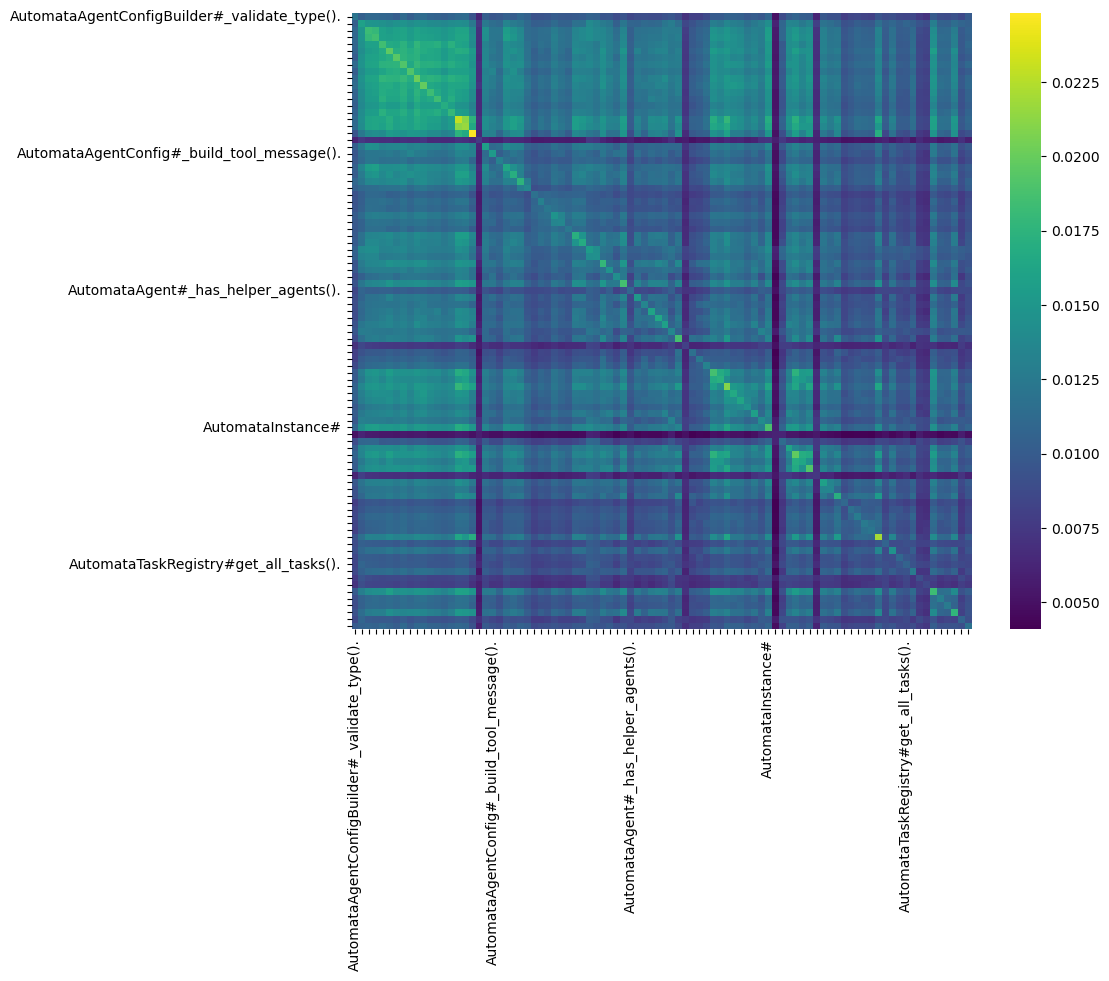

In [11]:
plot_similarity_heatmap(transformed_similarity_df)
